In [16]:
import cftime
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import os

%matplotlib widget

Text(0, 0.5, 'Vertically Averaged Current Speed at 4.5 m depth [m/s]')

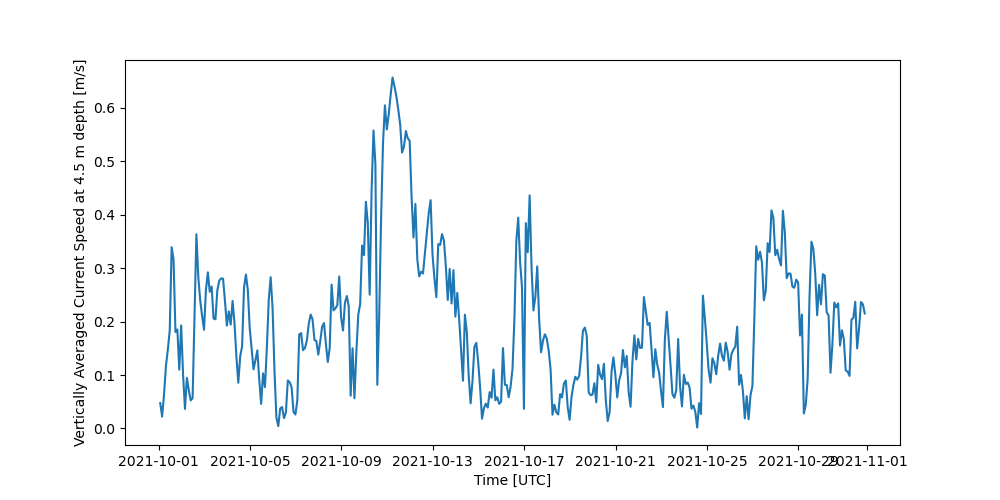

In [24]:
currents_4p5meters_dataset = nc.Dataset('../../data/FRF-ocean_currents_awac-4.5m_202110.nc', mode='r')
time = cftime.num2pydate(currents_4p5meters_dataset['time'],
                        units=currents_4p5meters_dataset['time'].units,
                        calendar=currents_4p5meters_dataset['time'].calendar)
current_speed = currents_4p5meters_dataset['currentSpeed'][:]
current_dir = currents_4p5meters_dataset['currentDirection'][:]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, current_speed)
ax.set_xlabel('Time [UTC]')
ax.set_ylabel('Vertically Averaged Current Speed at 4.5 m depth [m/s]')

Elevation of this data is 1.0 m from NAVD88.


Text(0, 0.5, 'Current Speed at Elevation \n 1.0 meters from NAVD88 [m/s]')

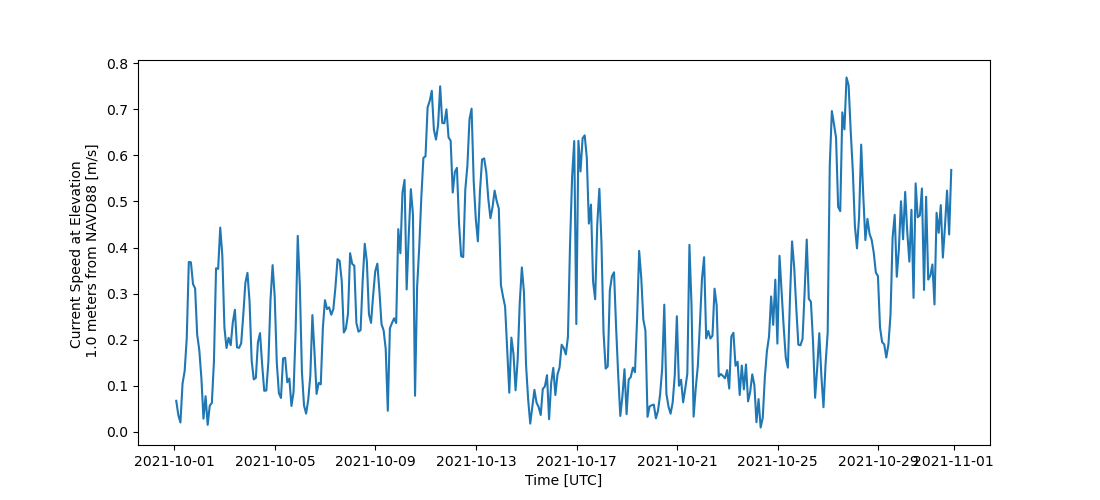

In [42]:
# Plot just the near surface current magnitude
depth = currents_4p5meters_dataset['depth'][:]
elevation_ind = -1
print(f'Elevation of this data is {depth[elevation_ind]} m from NAVD88.')

current_profile_east = currents_4p5meters_dataset['currentEast'][:]
current_profile_north = currents_4p5meters_dataset['currentNorth'][:]
surface_current_mag = np.sqrt(current_profile_east[:,elevation_ind]**2 + current_profile_north[:,elevation_ind]**2)

fig, ax = plt.subplots(figsize=(11,5))
ax.plot(time, surface_current_mag)
ax.set_xlabel('Time [UTC]')
ax.set_ylabel(f'Current Speed at Elevation \n {depth[elevation_ind]} meters from NAVD88 [m/s]')
